In [45]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import folium
import ast
import matplotlib
from shapely.geometry import Point

In [5]:
data = pd.read_csv("raw_data.csv")
# bounding box of India coordinates
india_bbox = (68.1766451354, 7.96553477623, 97.4025614766, 35.4940095078)
india_high_lat, india_low_lat = 35.4940095078, 7.96553477623
india_high_long, india_low_long = 97.4025614766, 68.1766451354

# dropping rows with NaN (although there is no NaNs)
data.dropna(inplace=True)

# dropping locations outside of bbox
outside_locations_df = data.loc[(data['Restaurant_latitude'] < india_low_lat) |
                              (data['Restaurant_latitude'] > india_high_lat) |
                              (data['Restaurant_longitude'] < india_low_long) |
                              (data['Restaurant_longitude'] > india_high_long) |
                              (data['Delivery_location_latitude'] < india_low_lat) |
                              (data['Delivery_location_latitude'] > india_high_lat) |
                              (data['Delivery_location_longitude'] < india_low_long) |
                              (data['Delivery_location_longitude'] > india_high_long)]

data.drop(outside_locations_df.index, inplace=True)


In [6]:
cluster_data = data[['Restaurant_latitude', 'Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]
cluster_data.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982


In [54]:
center_eendia_point = (21.9149, 78.0281)

mymap = folium.Map(location=center_eendia_point, zoom_start=6, prefer_canvas=True)
for idzex, row in cluster_data.iterrows():
    folium.Circle(location=(row[0],row[1]), radius=1, color='rgba(0, 0, 255, 0.25)', fill=True,  weight=4).add_to(mymap)

    # Add markers for the start and end points
    # folium.Marker(location=start_point, icon=folium.Icon(color='green')).add_to(mymap)
    # folium.Marker(location=end_point, icon=folium.Icon(color='red')).add_to(mymap)

# Save the map to an HTML file
mymap.save("all_restaurants.html")

In [57]:
kmeans = KMeans(n_clusters=22)
clusters = kmeans.fit_predict(cluster_data)

Text(0.5, 0, 'Delivery location latitude')

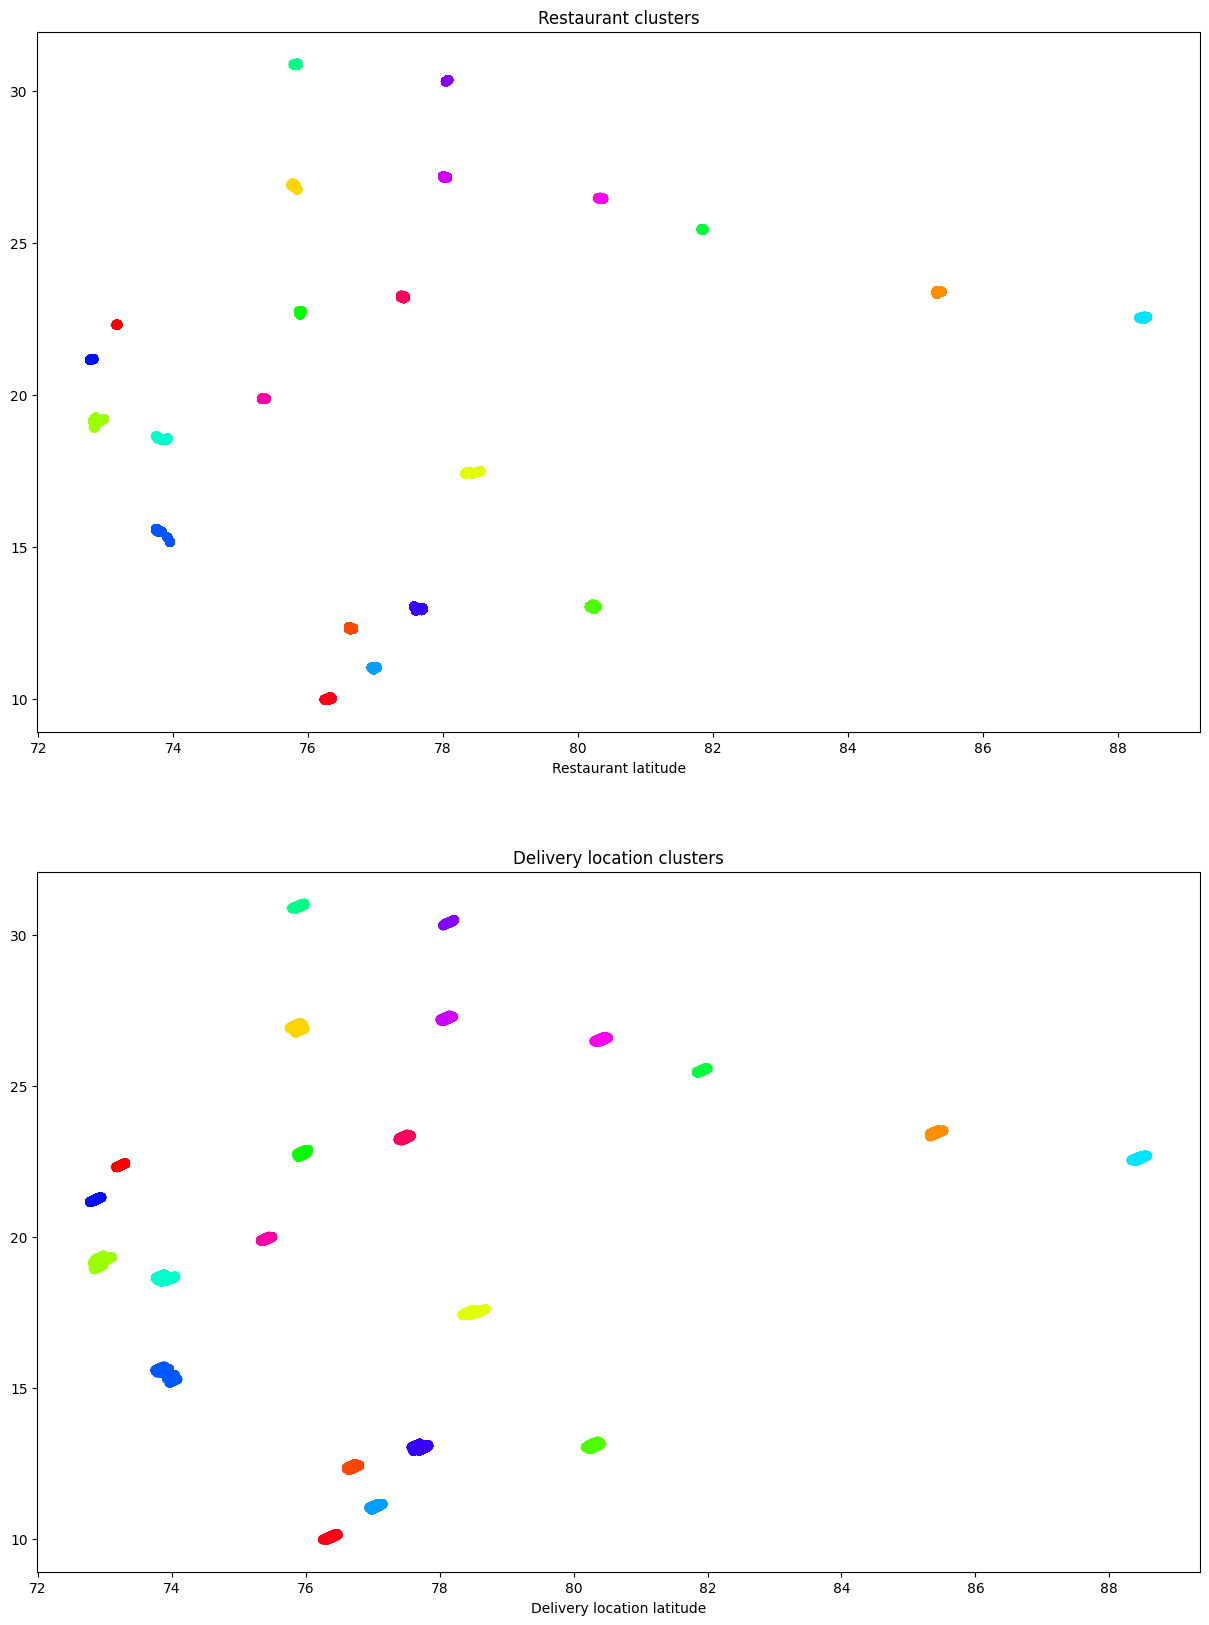

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))
ax[0].scatter(cluster_data['Restaurant_longitude'],cluster_data['Restaurant_latitude'], c=clusters.astype(float)/24, cmap='hsv')
ax[0].set_title("Restaurant clusters")
ax[0].set_xlabel('Restaurant longitude')
ax[0].set_xlabel('Restaurant latitude')
ax[1].scatter( cluster_data['Delivery_location_longitude'], cluster_data['Delivery_location_latitude'], c=clusters.astype(float)/24, cmap='hsv')
ax[1].set_title("Delivery location clusters")
ax[1].set_xlabel('Delivery location longitude')
ax[1].set_xlabel('Delivery location latitude')

In [59]:
clusters_geo = cluster_data.copy()
clusters_geo['cluster_n'] = clusters
clusters_geo.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,cluster_n
0,22.745049,75.892471,22.765049,75.912471,7
1,12.913041,77.683237,13.043041,77.813237,15
2,12.914264,77.678400,12.924264,77.688400,15
3,11.003669,76.976494,11.053669,77.026494,12
4,12.972793,80.249982,13.012793,80.289982,6


In [107]:
restaurant_plot = clusters_geo[clusters_geo['cluster_n']==21]
restaurant_plot.head()


,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,cluster_n
10,10.003064,76.307589,10.043064,76.347589,21
167,10.035573,76.336958,10.105573,76.406958,21
220,10.020683,76.310631,10.030683,76.320631,21
267,10.027014,76.308053,10.137014,76.418053,21
395,10.027014,76.308053,10.157014,76.438053,21


In [108]:
center_eendia_point = (21.9149, 78.0281)

mymap = folium.Map(location=center_eendia_point, zoom_start=6, prefer_canvas=True)
for idzex, row in restaurant_plot.iterrows():
    folium.Circle(location=(row[0],row[1]), radius=1, color='rgba(0, 0, 255, 0.25)', fill=True,  weight=4).add_to(mymap)

    # Add markers for the start and end points
    # folium.Marker(location=start_point, icon=folium.Icon(color='green')).add_to(mymap)
    # folium.Marker(location=end_point, icon=folium.Icon(color='red')).add_to(mymap)

# Save the map to an HTML file
mymap.save("cluster_test.html")


In [109]:
clusters_geo.to_csv("cluster_with_points.csv", index=True)

In [112]:
clusters_df = clusters_geo["cluster_n"]
clusters_df.head()
clusters_df.to_csv("clusters.csv", index=True)